In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

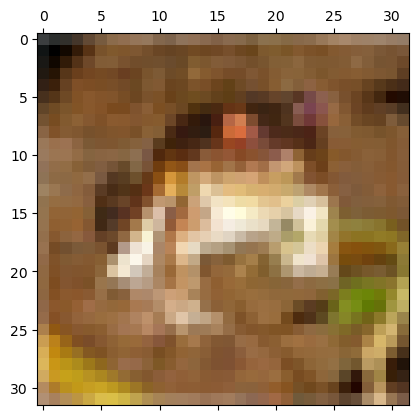

In [14]:
plt.matshow(x_train[0])

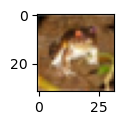

In [15]:
plt.figure(figsize=(7,1))
plt.imshow(x_train[0])

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [20]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build simple artificial neural network for image classification

In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 114s 72ms/step - loss: 1.8112 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6229 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5390 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.4823 - accuracy: 0.4789
Epoch 5/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.4314 - accuracy: 0.4968


# got 49% accuracy

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.61      0.53      1000
           1       0.63      0.59      0.61      1000
           2       0.24      0.64      0.35      1000
           3       0.45      0.15      0.23      1000
           4       0.42      0.30      0.35      1000
           5       0.43      0.33      0.37      1000
           6       0.48      0.55      0.51      1000
           7       0.65      0.45      0.53      1000
           8       0.63      0.56      0.59      1000
           9       0.68      0.37      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



# Now let us build a convolutional neural network to train our images

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.4879 - accuracy: 0.4642
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1233 - accuracy: 0.6059
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9881 - accuracy: 0.6553
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9125 - accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8450 - accuracy: 0.7085
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7910 - accuracy: 0.7264
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7445 - accuracy: 0.7407
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7039 - accuracy: 0.7567
Epoch 9/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.6598 - accuracy: 0.7700
Epoch 10/10
1563/1563 [==============================] - 38s 24m

In [26]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9416 - accuracy: 0.6920


[0.9415849447250366, 0.6919999718666077]

# got 70 % accuracy


In [27]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[3.28269554e-04, 7.33210618e-05, 1.74793138e-04, 5.01226068e-01,
        1.77647860e-04, 1.69932581e-02, 5.78698469e-04, 2.17709976e-06,
        4.79690999e-01, 7.54729845e-04],
       [1.79832190e-01, 5.00722937e-02, 3.82783852e-04, 1.39727376e-07,
        4.44606940e-07, 2.81876016e-08, 4.95302608e-08, 1.71417378e-06,
        7.69598663e-01, 1.11648784e-04],
       [7.47321099e-02, 1.66398242e-01, 5.88927243e-04, 2.96423095e-03,
        2.05855351e-03, 9.20815568e-04, 2.25775011e-06, 2.03712098e-03,
        7.01513350e-01, 4.87843938e-02],
       [9.73151386e-01, 5.65654118e-05, 2.61891466e-02, 1.06941388e-05,
        1.08983149e-05, 4.09373882e-07, 2.22695348e-06, 1.85015563e-06,
        5.49833640e-04, 2.70155251e-05],
       [7.56075394e-07, 6.05721289e-06, 2.07145028e-02, 1.37199938e-01,
        2.72564888e-01, 4.74464335e-03, 5.64736843e-01, 2.11757606e-06,
        2.27651126e-05, 7.53251697e-06]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [36]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

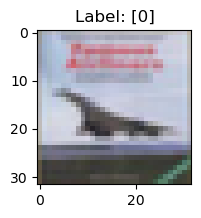

In [38]:

def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.title(f"Label: {y[index]}")
    plt.show()

# Now you can call the plot_sample function
plot_sample(x_test, y_test, 3)


In [39]:
classes[y_classes[3]]

'airplane'

In [40]:
classes[y_classes[3]]

'airplane'